# Start

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
players_df = pd.read_csv("data/players.csv")
players_teams_df = pd.read_csv("data/players_teams.csv")
teams_df = pd.read_csv("data/teams.csv")
teams_post_df = pd.read_csv("data/teams_post.csv")
coaches_df = pd.read_csv("data/coaches.csv")
series_post_df = pd.read_csv("data/series_post.csv")
awards_df = pd.read_csv("data/awards_players.csv")

# Players

Here we have the players table

           height      weight
count  893.000000  893.000000
mean    65.500560  145.415454
std     20.940425   61.275703
min      0.000000    0.000000
25%     68.000000  140.000000
50%     72.000000  162.000000
75%     75.000000  180.000000
max     80.000000  254.000000
pos
G      309
F      230
C      130
F-C     70
G-F     55
F-G     12
C-F      9
Name: count, dtype: int64


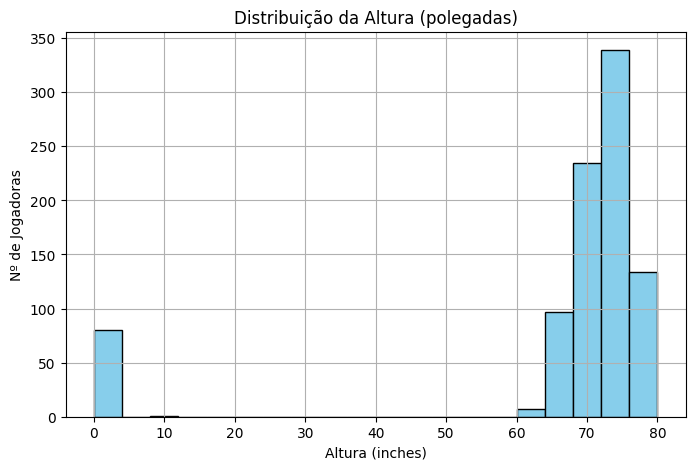

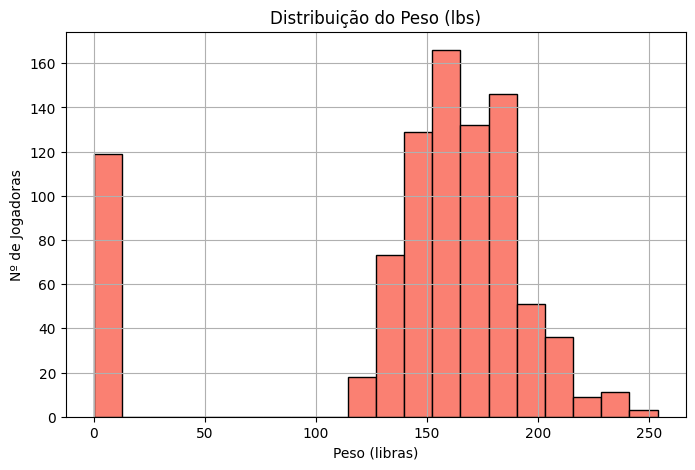

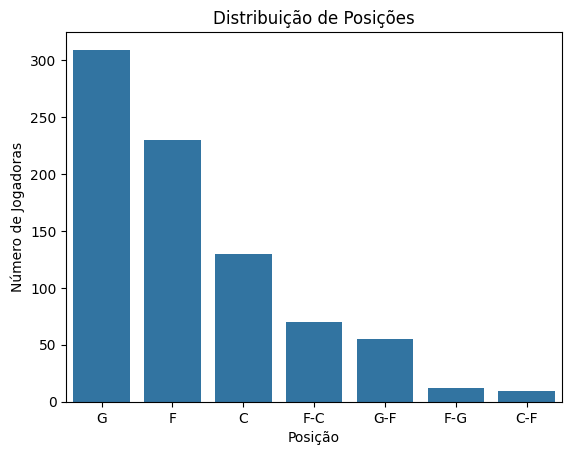

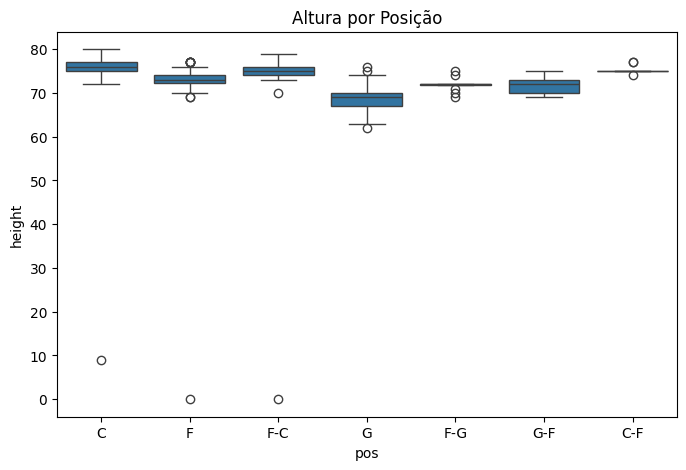

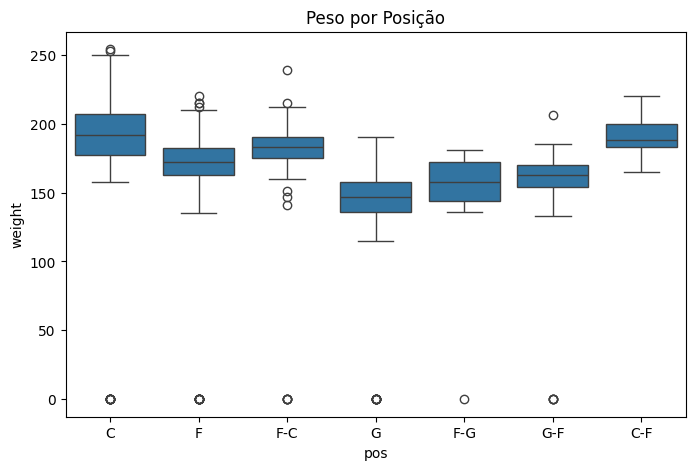

In [11]:
#Linha -> lista de jogadores com dados biográficos e fisicos
players_df.head()
print(players_df[['height','weight']].describe())
print(players_df['pos'].value_counts()) #Jogadores por posição (C, F, G)

plt.figure(figsize=(8,5))
players_df['height'].hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Distribuição da Altura (polegadas)")
plt.xlabel("Altura (inches)")
plt.ylabel("Nº de Jogadoras")
plt.show()

plt.figure(figsize=(8,5))
players_df['weight'].hist(bins=20, color="salmon", edgecolor="black")
plt.title("Distribuição do Peso (lbs)")
plt.xlabel("Peso (libras)")
plt.ylabel("Nº de Jogadoras")
plt.show()

sns.countplot(data=players_df, x="pos", order=players_df['pos'].value_counts().index)
plt.title("Distribuição de Posições")
plt.xlabel("Posição")
plt.ylabel("Número de Jogadoras")
plt.show()

#ALTURA E PESO POR POSIÇÃO
plt.figure(figsize=(8,5))
sns.boxplot(data=players_df, x="pos", y="height")
plt.title("Altura por Posição")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=players_df, x="pos", y="weight")
plt.title("Peso por Posição")
plt.show()



# Players Teams

Here we have the players teams table

                GP      minutes       points     rebounds      assists  \
count  1876.000000  1876.000000  1876.000000  1876.000000  1876.000000   
mean     24.320896   501.269190   176.261727    78.722814    39.031983   
std      10.460614   359.566117   161.983839    69.210226    40.147037   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%      17.000000   165.000000    41.000000    21.000000     8.000000   
50%      29.000000   459.000000   129.000000    63.000000    26.000000   
75%      32.000000   826.250000   284.000000   119.000000    57.250000   
max      34.000000  1234.000000   860.000000   363.000000   236.000000   

            steals       blocks    turnovers  
count  1876.000000  1876.000000  1876.000000  
mean     19.600746     9.065032    36.480277  
std      17.542694    13.497853    27.956998  
min       0.000000     0.000000     0.000000  
25%       5.000000     1.000000    11.000000  
50%      16.000000     4.000000    32.000000  
75% 

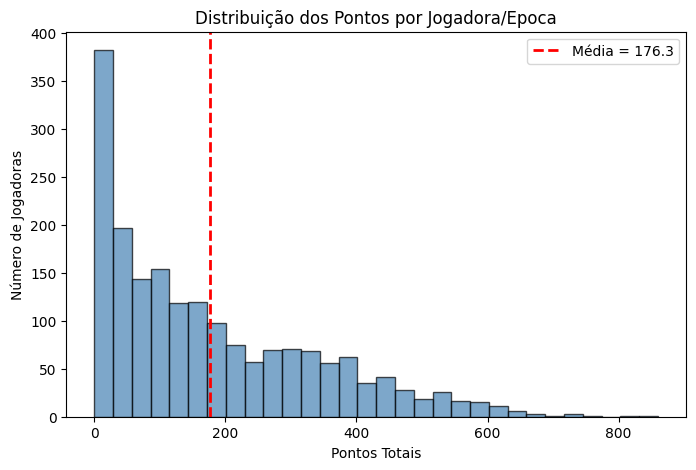

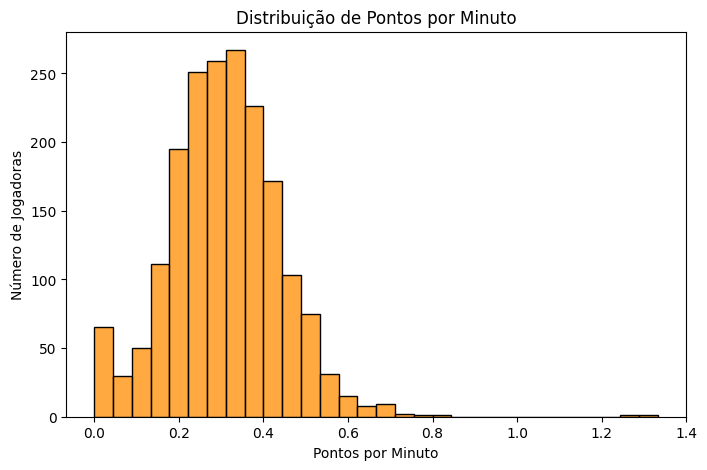

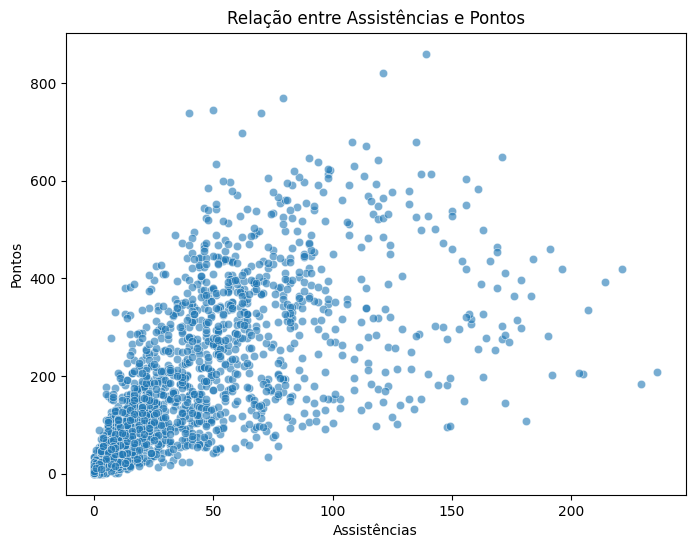

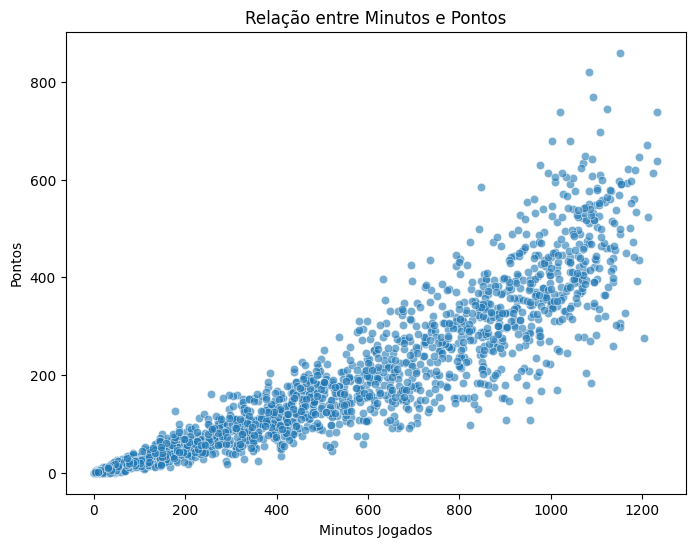

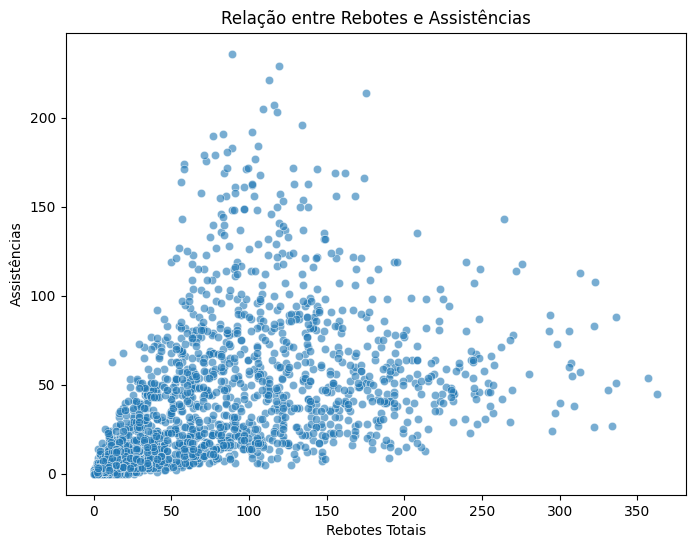

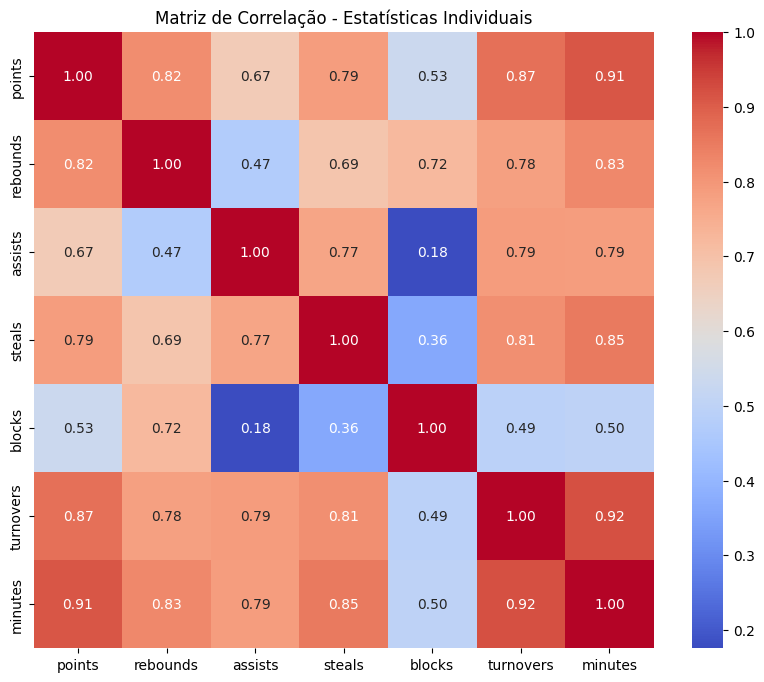

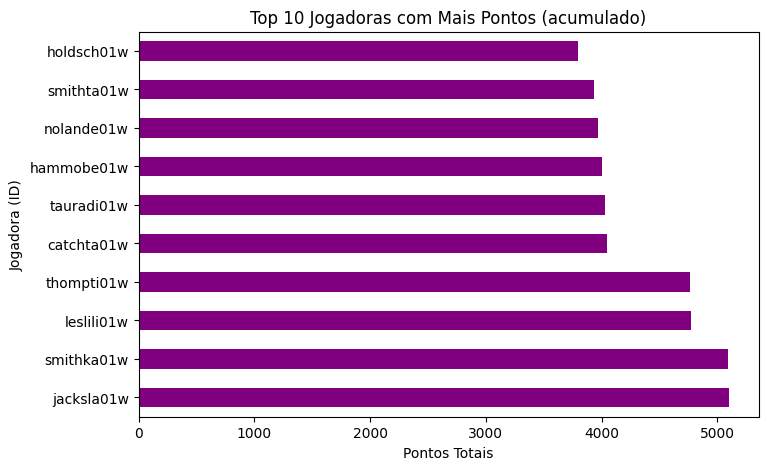

In [13]:
#representa o desempenho de um jogador (player) numa época (year) por uma equipa (tmID).
players_teams_df.head()
# ------------------------------
# 1. Estatísticas descritivas básicas
# ------------------------------
print(players_teams_df[['GP','minutes','points','rebounds','assists','steals','blocks','turnovers']].describe())

# ------------------------------
# 2. Distribuição de Pontos
# ------------------------------
plt.figure(figsize=(8,5))
plt.hist(players_teams_df['points'], bins=30, color="steelblue", edgecolor="black", alpha=0.7)
plt.axvline(players_teams_df['points'].mean(), color='red', linestyle='dashed', linewidth=2, 
            label=f"Média = {players_teams_df['points'].mean():.1f}")
plt.title("Distribuição dos Pontos por Jogadora/Epoca")
plt.xlabel("Pontos Totais")
plt.ylabel("Número de Jogadoras")
plt.legend()
plt.show()

# ------------------------------
# 3. Pontos por Minuto
# ------------------------------
players_teams_df['points_per_min'] = players_teams_df['points'] / players_teams_df['minutes']
plt.figure(figsize=(8,5))
sns.histplot(players_teams_df['points_per_min'], bins=30, color="darkorange")
plt.title("Distribuição de Pontos por Minuto")
plt.xlabel("Pontos por Minuto")
plt.ylabel("Número de Jogadoras")
plt.show()

# ------------------------------
# 4. Assistências vs Pontos
# ------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(data=players_teams_df, x='assists', y='points', alpha=0.6)
plt.title("Relação entre Assistências e Pontos")
plt.xlabel("Assistências")
plt.ylabel("Pontos")
plt.show()

# ------------------------------
# 5. Minutos vs Pontos
# ------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(data=players_teams_df, x='minutes', y='points', alpha=0.6)
plt.title("Relação entre Minutos e Pontos")
plt.xlabel("Minutos Jogados")
plt.ylabel("Pontos")
plt.show()

# ------------------------------
# 6. Rebotes vs Assistências (estilo defensivo/ofensivo)
# ------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(data=players_teams_df, x='rebounds', y='assists', alpha=0.6)
plt.title("Relação entre Rebotes e Assistências")
plt.xlabel("Rebotes Totais")
plt.ylabel("Assistências")
plt.show()

# ------------------------------
# 7. Correlação geral entre estatísticas principais
# ------------------------------
plt.figure(figsize=(10,8))
sns.heatmap(players_teams_df[['points','rebounds','assists','steals','blocks','turnovers','minutes']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação - Estatísticas Individuais")
plt.show()

# ------------------------------
# 8. Top Jogadoras (por Pontos)
# ------------------------------
top_players = players_teams_df.groupby('playerID')['points'].sum().sort_values(ascending=False).head(10)
top_players.plot(kind='barh', figsize=(8,5), color="purple")
plt.title("Top 10 Jogadoras com Mais Pontos (acumulado)")
plt.xlabel("Pontos Totais")
plt.ylabel("Jogadora (ID)")
plt.show()



# Teams

Here we have the teams table

Vitórias: count    142.000000
mean      16.661972
std        4.999131
min        4.000000
25%       13.000000
50%       17.000000
75%       20.000000
max       28.000000
Name: won, dtype: float64
Derrotas: count    142.000000
mean      16.661972
std        4.999131
min        4.000000
25%       14.000000
50%       16.000000
75%       20.000000
max       30.000000
Name: lost, dtype: float64
Pontos Marcados (Ataque): count     142.000000
mean     2366.274648
std       243.154860
min      1822.000000
25%      2185.250000
50%      2340.000000
75%      2531.500000
max      3156.000000
Name: o_pts, dtype: float64
Pontos Sofridos (Defesa): count     142.000000
mean     2366.260563
std       234.615384
min      1788.000000
25%      2196.750000
50%      2339.500000
75%      2522.750000
max      3031.000000
Name: d_pts, dtype: float64


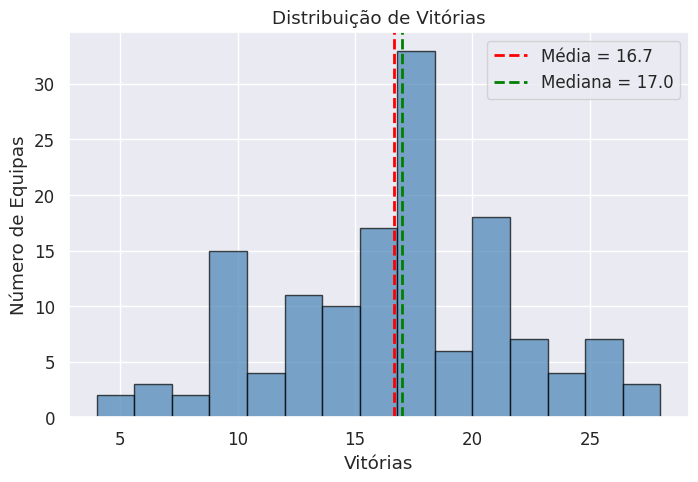

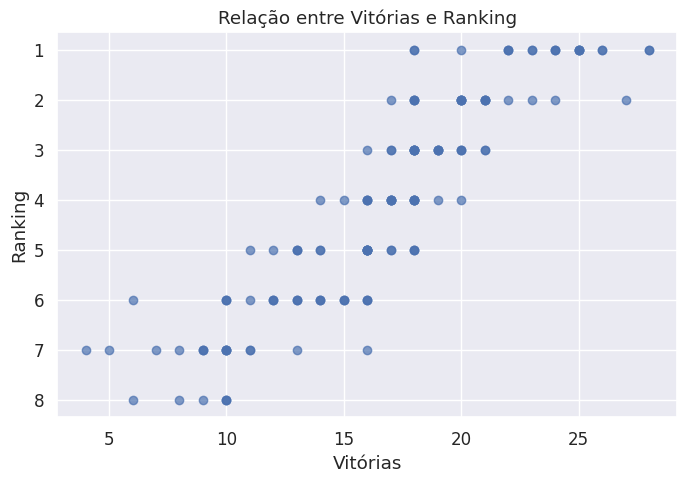

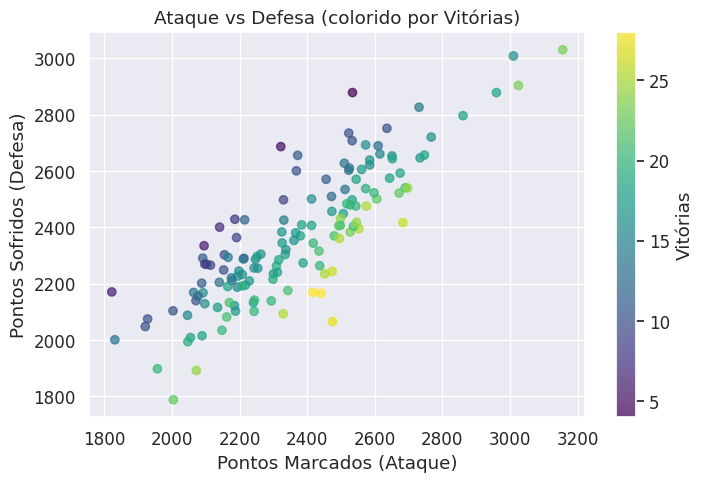

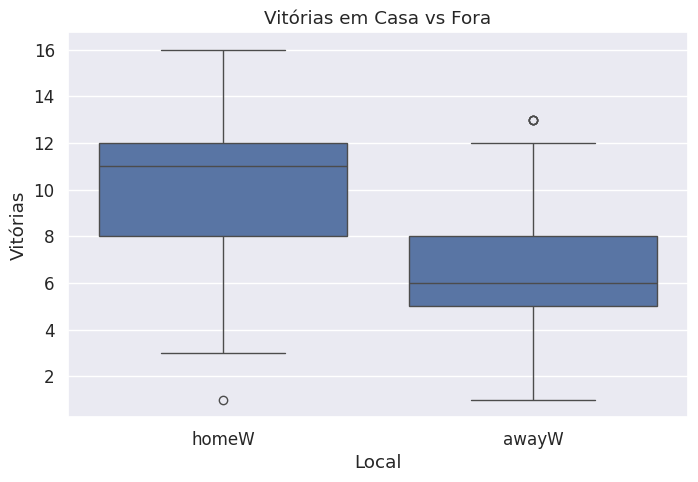

In [ ]:
#Linha -> Resumo da equipa em toda a temporada

# ------------------------------
# 1. Estatísticas descritivas
# ------------------------------
print("Vitórias:", teams_df['won'].describe()) #INUTIL
print("Derrotas:", teams_df['lost'].describe()) #INUTIL
print("Pontos Marcados (Ataque):", teams_df['o_pts'].describe())
print("Pontos Sofridos (Defesa):", teams_df['d_pts'].describe())

# ------------------------------
# 2. Distribuição de Vitórias
# ------------------------------
plt.figure(figsize=(8,5))
plt.hist(teams_df['won'], bins=15, color="steelblue", edgecolor="black", alpha=0.7)
plt.axvline(teams_df['won'].mean(), color='red', linestyle='dashed', linewidth=2, 
            label=f"Média = {teams_df['won'].mean():.1f}")
plt.axvline(teams_df['won'].median(), color='green', linestyle='dashed', linewidth=2, 
            label=f"Mediana = {teams_df['won'].median():.1f}")
plt.title("Distribuição de Vitórias")
plt.xlabel("Vitórias")
plt.ylabel("Número de Equipas")
plt.legend()
plt.show()

# ------------------------------
# 3. Relação Vitórias ↔ Ranking
# ------------------------------
plt.figure(figsize=(8,5))
plt.scatter(teams_df['won'], teams_df['rank'], alpha=0.7)
plt.xlabel("Vitórias")
plt.ylabel("Ranking")
plt.title("Relação entre Vitórias e Ranking")
plt.gca().invert_yaxis()  # Rank 1 é o melhor → eixo invertido
plt.show()

# ------------------------------
# 4. Ataque vs Defesa (cor por Vitórias)
# ------------------------------
plt.figure(figsize=(8,5))
sc = plt.scatter(teams_df['o_pts'], teams_df['d_pts'], 
                 c=teams_df['won'], cmap="viridis", alpha=0.7)
plt.colorbar(sc, label="Vitórias")
plt.xlabel("Pontos Marcados (Ataque)")
plt.ylabel("Pontos Sofridos (Defesa)")
plt.title("Ataque vs Defesa (colorido por Vitórias)")
plt.show()

# ------------------------------
# 5. Casa vs Fora
# ------------------------------
plt.figure(figsize=(8,5))
home_away = teams_df[['homeW','awayW']].melt(var_name='Local', value_name='Vitórias')
sns.boxplot(data=home_away, x='Local', y='Vitórias')
plt.title("Vitórias em Casa vs Fora")
plt.show()


# Teams Results

Here we have the teams results table 

In [19]:
teams_post_df.head()

,year,tmID,lgID,W,L
0,1,HOU,WNBA,6,0
1,1,ORL,WNBA,1,2
2,1,CLE,WNBA,3,3
3,1,WAS,WNBA,0,2
4,1,NYL,WNBA,4,3


# Coaches

Here we have the coaches table

In [20]:
coaches_df.head()

,coachID,year,tmID,lgID,stint,won,lost,post_wins,post_losses
0,adamsmi01w,5,WAS,WNBA,0,17,17,1,2
1,adubari99w,1,NYL,WNBA,0,20,12,4,3
2,adubari99w,2,NYL,WNBA,0,21,11,3,3
3,adubari99w,3,NYL,WNBA,0,18,14,4,4
4,adubari99w,4,NYL,WNBA,0,16,18,0,0


# Series Post

Here we have the series post table

In [9]:
series_post_df.head()

,year,round,series,tmIDWinner,lgIDWinner,tmIDLoser,lgIDLoser,W,L
0,1,FR,A,CLE,WNBA,ORL,WNBA,2,1
1,1,FR,B,NYL,WNBA,WAS,WNBA,2,0
2,1,FR,C,LAS,WNBA,PHO,WNBA,2,0
3,1,FR,D,HOU,WNBA,SAC,WNBA,2,0
4,1,CF,E,HOU,WNBA,LAS,WNBA,2,0


# Awards

Here we have the awards table

In [ ]:
awards_df.head()

,playerID,award,year,lgID
0,thompti01w,All-Star Game Most Valuable Player,1,WNBA
1,leslili01w,All-Star Game Most Valuable Player,2,WNBA
2,leslili01w,All-Star Game Most Valuable Player,3,WNBA
3,teaslni01w,All-Star Game Most Valuable Player,4,WNBA
4,swoopsh01w,All-Star Game Most Valuable Player,6,WNBA
